## This notebook will be used for the capstone project

In [1]:
#import numpy as np
#import pandas as pd

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


### Segmenting and Clustering Neighborhoods in Toronto

### Question 1

#### Import libraries

In [3]:
import requests
import numpy as np
import pandas as pd


In [4]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
wiki_url = requests.get(url)
wiki_url

<Response [200]>

In [5]:
wiki_data = pd.read_html(wiki_url.text)
wiki_data

[    Postal Code           Borough  \
 0           M1A      Not assigned   
 1           M2A      Not assigned   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 ..          ...               ...   
 175         M5Z      Not assigned   
 176         M6Z      Not assigned   
 177         M7Z      Not assigned   
 178         M8Z         Etobicoke   
 179         M9Z      Not assigned   
 
                                          Neighbourhood  
 0                                         Not assigned  
 1                                         Not assigned  
 2                                            Parkwoods  
 3                                     Victoria Village  
 4                            Regent Park, Harbourfront  
 ..                                                 ...  
 175                                       Not assigned  
 176                                       Not assigned  
 177                

#### Drop unwanted tables

In [6]:
wiki_data = wiki_data[0]
wiki_data

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


#### Ignore cells where Borough is not assigned and reset index

In [7]:
wiki_data.drop(wiki_data.loc[wiki_data['Borough']=='Not assigned'].index, inplace=True)
wiki_data.reset_index(drop= True, inplace=True)
wiki_data

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


#### Check if Postal code is repeated

In [8]:
wiki_data["Postal Code"].value_counts(sort=False)

M5L    1
M4L    1
M5R    1
M1P    1
M1W    1
      ..
M6N    1
M3L    1
M4C    1
M2M    1
M5K    1
Name: Postal Code, Length: 103, dtype: int64

#### Number of rows in the dataframe

In [9]:
wiki_data.shape[0]

103

### Question 2

#### Get the coordinate data

In [10]:
coordinates = 'https://cocl.us/Geospatial_data'
coordinates_df = pd.read_csv(coordinates)
coordinates_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merge the wikipedia data with the coordinate data and name the new dataframe 'df'

In [11]:
df = pd.merge(left = wiki_data, right = coordinates_df)
df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


#### Shape of the new dataframe

In [12]:
df.shape

(103, 5)

### Question 3

#### Import libraries

In [41]:
import folium

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


#### Get coordinates of Toronto

In [42]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Create a map of Toronto with Neighbourhoods superimposed on top

In [43]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Define Foursquare credentials

In [44]:
CLIENT_ID = 'APU40NINR1N3U2UMVDGSKZKHXFHKE2MZR0FMULB15ZLBDFPM' # your Foursquare ID
CLIENT_SECRET = '4KQG42CH1C3BJN0TGYOB5MVRYPYY2KYJVUESYENNU4BMREUW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: APU40NINR1N3U2UMVDGSKZKHXFHKE2MZR0FMULB15ZLBDFPM
CLIENT_SECRET:4KQG42CH1C3BJN0TGYOB5MVRYPYY2KYJVUESYENNU4BMREUW


#### Function to get venue categories in Toronto

In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Create dataframe that contains venue categories in Toronto

In [46]:
toronto_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

#### View the top 5 rows in the dataframe

In [47]:
toronto_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


#### The shape of the dataframe

In [48]:
toronto_venues.shape

(2129, 7)

#### Group the venues by neighbourhood and find how many venues were returned for each neighbourhood

In [49]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",23,23,23,23,23,23
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
...,...,...,...,...,...,...
"Willowdale, Willowdale West",5,5,5,5,5,5
Woburn,3,3,3,3,3,3
Woodbine Heights,6,6,6,6,6,6


In [50]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


#### Analyse each neighbourhood

In [51]:
# Onehot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Shape of dataframe

In [52]:
toronto_onehot.shape

(2129, 274)

#### Group rows by neighbourhood and find the mean of the frequency of occurrence of each category

In [53]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Print the top 10 most common venues in each neighbourhood

In [54]:
num_top_venues = 10

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                             venue  freq
0                   Breakfast Spot   0.2
1                     Skating Rink   0.2
2                           Lounge   0.2
3                   Clothing Store   0.2
4        Latin American Restaurant   0.2
5                            Motel   0.0
6              Moroccan Restaurant   0.0
7              Monument / Landmark   0.0
8  Molecular Gastronomy Restaurant   0.0
9       Modern European Restaurant   0.0


----Alderwood, Long Branch----
                      venue  freq
0               Pizza Place  0.25
1                       Pub  0.12
2            Sandwich Place  0.12
3               Coffee Shop  0.12
4                       Gym  0.12
5                  Pharmacy  0.12
6                      Pool  0.12
7                      Park  0.00
8             Movie Theater  0.00
9  Mediterranean Restaurant  0.00


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                Coffee Shop  0

                  venue  freq
0                   Gym  0.12
1   Japanese Restaurant  0.08
2            Beer Store  0.08
3           Coffee Shop  0.08
4            Restaurant  0.08
5    Italian Restaurant  0.04
6        Clothing Store  0.04
7             Bike Shop  0.04
8  Caribbean Restaurant  0.04
9           Supermarket  0.04


----Dorset Park, Wexford Heights, Scarborough Town Centre----
                      venue  freq
0         Indian Restaurant  0.25
1        Chinese Restaurant  0.12
2     Vietnamese Restaurant  0.12
3        Light Rail Station  0.12
4    Furniture / Home Store  0.12
5                   Brewery  0.12
6                 Pet Store  0.12
7      Other Great Outdoors  0.00
8                     Motel  0.00
9  Mediterranean Restaurant  0.00


----Downsview----
                       venue  freq
0                       Park   0.2
1              Grocery Store   0.1
2                 Food Truck   0.1
3                       Bank   0.1
4              Shopping Mall   0.1
5 

                             venue  freq
0                Mobile Phone Shop  0.25
1                         Bus Line  0.25
2                   Sandwich Place  0.25
3                             Park  0.25
4                            Motel  0.00
5              Moroccan Restaurant  0.00
6              Monument / Landmark  0.00
7  Molecular Gastronomy Restaurant  0.00
8       Modern European Restaurant  0.00
9                Accessories Store  0.00


----Lawrence Manor, Lawrence Heights----
                    venue  freq
0          Clothing Store  0.27
1  Furniture / Home Store  0.18
2       Accessories Store  0.09
3   Vietnamese Restaurant  0.09
4             Coffee Shop  0.09
5             Event Space  0.09
6                Boutique  0.09
7     Sporting Goods Shop  0.09
8               Hotel Bar  0.00
9             IT Services  0.00


----Lawrence Park----
                             venue  freq
0                         Bus Line  0.25
1                      Swim School  0.25
2      

                             venue  freq
0                           Garden   0.5
1                     Home Service   0.5
2                Accessories Store   0.0
3                Mobile Phone Shop   0.0
4                            Motel   0.0
5              Moroccan Restaurant   0.0
6              Monument / Landmark   0.0
7  Molecular Gastronomy Restaurant   0.0
8       Modern European Restaurant   0.0
9               Miscellaneous Shop   0.0


----Rouge Hill, Port Union, Highland Creek----
                             venue  freq
0                              Bar   1.0
1                Accessories Store   0.0
2                Mobile Phone Shop   0.0
3                            Motel   0.0
4              Moroccan Restaurant   0.0
5              Monument / Landmark   0.0
6  Molecular Gastronomy Restaurant   0.0
7       Modern European Restaurant   0.0
8               Miscellaneous Shop   0.0
9                           Museum   0.0


----Runnymede, Swansea----
                venu

                             venue  freq
0                             Park  0.50
1                    Jewelry Store  0.25
2                Convenience Store  0.25
3                Mobile Phone Shop  0.00
4                    Movie Theater  0.00
5                            Motel  0.00
6              Moroccan Restaurant  0.00
7              Monument / Landmark  0.00
8  Molecular Gastronomy Restaurant  0.00
9       Modern European Restaurant  0.00


----Wexford, Maryvale----
                             venue  freq
0                       Smoke Shop   0.2
1                   Sandwich Place   0.2
2                      Auto Garage   0.2
3        Middle Eastern Restaurant   0.2
4                           Bakery   0.2
5  Molecular Gastronomy Restaurant   0.0
6                    Movie Theater   0.0
7                            Motel   0.0
8              Moroccan Restaurant   0.0
9              Monument / Landmark   0.0


----Willowdale, Willowdale East----
               venue  freq
0   R

#### Function to sort the most common venues in descending order

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Create new dataframe and display the top ten venues in each neighbourhood

In [56]:
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']

#Append ordinals
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Lounge,Breakfast Spot,Latin American Restaurant,Clothing Store,Escape Room,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
1,"Alderwood, Long Branch",Pizza Place,Pool,Pub,Coffee Shop,Gym,Pharmacy,Sandwich Place,Escape Room,Electronics Store,Eastern European Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Health Food Store,Supermarket,Bridal Shop,Shopping Mall,Sandwich Place,Restaurant,Pizza Place,Pharmacy
3,Bayview Village,Japanese Restaurant,Bank,Chinese Restaurant,Café,Yoga Studio,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Thai Restaurant,Italian Restaurant,Café,Japanese Restaurant,Sushi Restaurant,Restaurant,Indian Restaurant,Juice Bar


#### Clustering

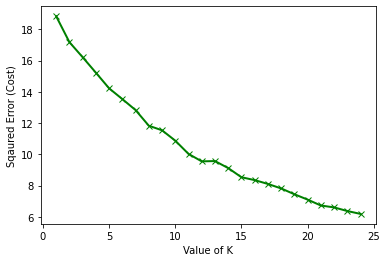

In [77]:
import matplotlib.pyplot as plt
cost =[] 
for i in range(1, 25): 
    kmeans = KMeans(n_clusters = i) 
    kmeans.fit(toronto_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(kmeans.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 25), cost, 'bx-', color ='g', linewidth ='2') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k

In [30]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 1, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

#### Create new dataframe that has column containing the cluster label for each neighbourhood

In [31]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighbourhood
toronto_merged = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Food & Drink Shop,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Escape Room
1,M4A,North York,Victoria Village,43.725882,-79.315572,4.0,Pizza Place,Hockey Arena,Intersection,French Restaurant,Portuguese Restaurant,Coffee Shop,Electronics Store,Escape Room,Eastern European Restaurant,Dumpling Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4.0,Coffee Shop,Park,Bakery,Café,Pub,Breakfast Spot,Restaurant,Theater,Performing Arts Venue,Brewery
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4.0,Clothing Store,Furniture / Home Store,Accessories Store,Coffee Shop,Sporting Goods Shop,Event Space,Boutique,Vietnamese Restaurant,Coworking Space,Dog Run
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Mexican Restaurant,Italian Restaurant,Japanese Restaurant,Beer Bar,Smoothie Shop,Burrito Place,Sandwich Place


#### Drop Nan values in the cluster labels column

In [32]:
toronto_merged.dropna(subset=['Cluster Labels'], inplace = True)
toronto_merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Food & Drink Shop,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Escape Room
1,M4A,North York,Victoria Village,43.725882,-79.315572,4.0,Pizza Place,Hockey Arena,Intersection,French Restaurant,Portuguese Restaurant,Coffee Shop,Electronics Store,Escape Room,Eastern European Restaurant,Dumpling Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4.0,Coffee Shop,Park,Bakery,Café,Pub,Breakfast Spot,Restaurant,Theater,Performing Arts Venue,Brewery
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4.0,Clothing Store,Furniture / Home Store,Accessories Store,Coffee Shop,Sporting Goods Shop,Event Space,Boutique,Vietnamese Restaurant,Coworking Space,Dog Run
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Mexican Restaurant,Italian Restaurant,Japanese Restaurant,Beer Bar,Smoothie Shop,Burrito Place,Sandwich Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,4.0,River,Pool,Smoke Shop,Yoga Studio,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,4.0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Fast Food Restaurant,Restaurant,Hotel,Mediterranean Restaurant,Men's Store,Café
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,4.0,Yoga Studio,Auto Workshop,Garden Center,Garden,Light Rail Station,Fast Food Restaurant,Farmers Market,Comic Shop,Park,Pizza Place
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,2.0,Breakfast Spot,Business Service,Baseball Field,Yoga Studio,Electronics Store,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Escape Room


#### Set the data type of the cluster labels column to int64

In [34]:
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype('int64')
toronto_merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,Park,Food & Drink Shop,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Escape Room
1,M4A,North York,Victoria Village,43.725882,-79.315572,4,Pizza Place,Hockey Arena,Intersection,French Restaurant,Portuguese Restaurant,Coffee Shop,Electronics Store,Escape Room,Eastern European Restaurant,Dumpling Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Coffee Shop,Park,Bakery,Café,Pub,Breakfast Spot,Restaurant,Theater,Performing Arts Venue,Brewery
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4,Clothing Store,Furniture / Home Store,Accessories Store,Coffee Shop,Sporting Goods Shop,Event Space,Boutique,Vietnamese Restaurant,Coworking Space,Dog Run
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4,Coffee Shop,Sushi Restaurant,Yoga Studio,Mexican Restaurant,Italian Restaurant,Japanese Restaurant,Beer Bar,Smoothie Shop,Burrito Place,Sandwich Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,4,River,Pool,Smoke Shop,Yoga Studio,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,4,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Fast Food Restaurant,Restaurant,Hotel,Mediterranean Restaurant,Men's Store,Café
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,4,Yoga Studio,Auto Workshop,Garden Center,Garden,Light Rail Station,Fast Food Restaurant,Farmers Market,Comic Shop,Park,Pizza Place
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,2,Breakfast Spot,Business Service,Baseball Field,Yoga Studio,Electronics Store,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Escape Room


#### Visualize the clusters

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### View and examine each cluster

#### Cluster 1

In [36]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,0,Park,Food & Drink Shop,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Escape Room
21,York,0,Park,Women's Store,Bar,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
32,Scarborough,0,Playground,Jewelry Store,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Field
35,East York,0,Park,Metro Station,Convenience Store,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
64,York,0,Park,Jewelry Store,Convenience Store,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
66,North York,0,Park,Convenience Store,Yoga Studio,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
85,Scarborough,0,Playground,Park,Intersection,Concert Hall,Comic Shop,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room
91,Downtown Toronto,0,Park,Playground,Trail,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop


#### Cluster 2

In [37]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Scarborough,1,Fast Food Restaurant,Yoga Studio,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
50,North York,1,Pizza Place,Yoga Studio,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
56,York,1,Fast Food Restaurant,Sandwich Place,Discount Store,Fried Chicken Joint,Restaurant,Donut Shop,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
63,York,1,Pizza Place,Brewery,Convenience Store,Grocery Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
72,North York,1,Pizza Place,Grocery Store,Butcher,Coffee Shop,Pharmacy,Concert Hall,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant
82,Scarborough,1,Pizza Place,Gas Station,Noodle House,Chinese Restaurant,Fast Food Restaurant,Fried Chicken Joint,Bank,Italian Restaurant,Intersection,Thai Restaurant
89,Etobicoke,1,Pizza Place,Grocery Store,Video Store,Sandwich Place,Fast Food Restaurant,Beer Store,Fried Chicken Joint,Pharmacy,Golf Course,Department Store
93,Etobicoke,1,Pizza Place,Pool,Pub,Coffee Shop,Gym,Pharmacy,Sandwich Place,Escape Room,Electronics Store,Eastern European Restaurant


#### Cluster 3

In [38]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,North York,2,Baseball Field,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Filipino Restaurant
101,Etobicoke,2,Breakfast Spot,Business Service,Baseball Field,Yoga Studio,Electronics Store,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Escape Room


#### Cluster 4

In [39]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Etobicoke,3,Filipino Restaurant,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Health & Beauty Service


#### Cluster 5

In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,4,Pizza Place,Hockey Arena,Intersection,French Restaurant,Portuguese Restaurant,Coffee Shop,Electronics Store,Escape Room,Eastern European Restaurant,Dumpling Restaurant
2,Downtown Toronto,4,Coffee Shop,Park,Bakery,Café,Pub,Breakfast Spot,Restaurant,Theater,Performing Arts Venue,Brewery
3,North York,4,Clothing Store,Furniture / Home Store,Accessories Store,Coffee Shop,Sporting Goods Shop,Event Space,Boutique,Vietnamese Restaurant,Coworking Space,Dog Run
4,Downtown Toronto,4,Coffee Shop,Sushi Restaurant,Yoga Studio,Mexican Restaurant,Italian Restaurant,Japanese Restaurant,Beer Bar,Smoothie Shop,Burrito Place,Sandwich Place
7,North York,4,Gym,Coffee Shop,Restaurant,Japanese Restaurant,Beer Store,Asian Restaurant,Caribbean Restaurant,Italian Restaurant,Chinese Restaurant,Discount Store
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Downtown Toronto,4,Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,Gym,Asian Restaurant,Seafood Restaurant,Deli / Bodega,Steakhouse
98,Etobicoke,4,River,Pool,Smoke Shop,Yoga Studio,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
99,Downtown Toronto,4,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Fast Food Restaurant,Restaurant,Hotel,Mediterranean Restaurant,Men's Store,Café
100,East Toronto,4,Yoga Studio,Auto Workshop,Garden Center,Garden,Light Rail Station,Fast Food Restaurant,Farmers Market,Comic Shop,Park,Pizza Place
